In [399]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [400]:
df = pd.read_csv('Coffee_Stores_Data.csv')

In [401]:
df.head()

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


In [402]:
df.columns

Index(['StoreID', 'BusinessDate', 'PLU', 'Description', 'ItemType',
       'CategoryLvl1Desc', 'CategoryLvl2Desc', 'CategoryLvl3Desc',
       'ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'LatestOrder',
       'StockedOut', 'GroupID', 'MissedSales'],
      dtype='object')

In [403]:
df['PLU'].unique()

array([3000227,  830620,    6228,   12216, 3000277, 3000278,  851004,
        820602,  810407,  820801,  820902,  820224,  810703, 3000210,
       3000166, 3000096,  820221, 3000159, 3000162, 3000181, 3000207,
       3000209, 3000211, 3000212, 3000214, 3000024,  841402, 3000281,
       3000297, 3000296, 3000293], dtype=int64)

In [404]:
df_18 = df[df['StoreID'] == 18].copy()
# df_18['DayOfMonth'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
# df_18['DayOfWeek'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
# df_18['Month'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
# df_18['Year'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)
df_18.drop(['StoreID','Description','LatestOrder','CategoryLvl1Desc'],axis=1,inplace=True)

In [405]:
df_18.head()

,BusinessDate,PLU,ItemType,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales
39461,2019-06-29,3000227,Unassigned,Cold Case,Ready to Eat,4.0,1.0,4.0,0,3.0,0.00000
39462,2019-06-29,830620,Core,Bake Case,Muffins & Scones,2.0,1.0,0.0,1,3.0,2.56395
39463,2019-06-29,6228,Unassigned,Cold Case,Ready to Drink,6.0,0.0,8.0,0,3.0,0.00000
39464,2019-06-29,12216,Unassigned,Cold Case,Ready to Drink,0.0,0.0,3.0,0,3.0,0.00000
39465,2019-06-29,3000277,Unassigned,Cold Case,Ready to Eat,4.0,3.0,4.0,0,3.0,0.00000


In [406]:
# df_18[df_18['MissedSales'].isna()]['MissedSales'] = df_18['MissedSales'].mode()
df_18['MissedSales'].fillna(0,inplace=True)

In [407]:
df_18.isna().sum()

BusinessDate        0
PLU                 0
ItemType            0
CategoryLvl2Desc    0
CategoryLvl3Desc    0
ReceivedQuantity    0
SoldQuantity        0
EndQuantity         0
StockedOut          0
GroupID             0
MissedSales         0
dtype: int64

In [408]:
df_18 = pd.get_dummies(df_18,columns = ['ItemType','CategoryLvl2Desc','CategoryLvl3Desc','PLU'])

In [409]:
df_18.head()

,BusinessDate,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,ItemType_Core,ItemType_Seasonal,ItemType_Unassigned,...,PLU_3000211,PLU_3000212,PLU_3000214,PLU_3000227,PLU_3000277,PLU_3000278,PLU_3000281,PLU_3000293,PLU_3000296,PLU_3000297
39461,2019-06-29,4.0,1.0,4.0,0,3.0,0.00000,0,0,1,...,0,0,0,1,0,0,0,0,0,0
39462,2019-06-29,2.0,1.0,0.0,1,3.0,2.56395,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39463,2019-06-29,6.0,0.0,8.0,0,3.0,0.00000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39464,2019-06-29,0.0,0.0,3.0,0,3.0,0.00000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39465,2019-06-29,4.0,3.0,4.0,0,3.0,0.00000,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [410]:
df_18['BusinessDate'] = df_18['BusinessDate'].apply(lambda x:x + " 06:00:00")

In [411]:
df_18.columns

Index(['BusinessDate', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity',
       'StockedOut', 'GroupID', 'MissedSales', 'ItemType_Core',
       'ItemType_Seasonal', 'ItemType_Unassigned',
       'CategoryLvl2Desc_Bake Case', 'CategoryLvl2Desc_Cold Case',
       'CategoryLvl3Desc_Bagels', 'CategoryLvl3Desc_Cakes & Breads',
       'CategoryLvl3Desc_Cookies & Bars', 'CategoryLvl3Desc_Muffins & Scones',
       'CategoryLvl3Desc_Pastries', 'CategoryLvl3Desc_Ready to Drink',
       'CategoryLvl3Desc_Ready to Eat', 'PLU_6228', 'PLU_12216', 'PLU_810407',
       'PLU_810703', 'PLU_820221', 'PLU_820224', 'PLU_820602', 'PLU_820801',
       'PLU_820902', 'PLU_830620', 'PLU_841402', 'PLU_851004', 'PLU_3000024',
       'PLU_3000096', 'PLU_3000159', 'PLU_3000162', 'PLU_3000166',
       'PLU_3000181', 'PLU_3000207', 'PLU_3000209', 'PLU_3000210',
       'PLU_3000211', 'PLU_3000212', 'PLU_3000214', 'PLU_3000227',
       'PLU_3000277', 'PLU_3000278', 'PLU_3000281', 'PLU_3000293',
       'PLU_3000296', '

In [412]:
df_18.index = pd.to_datetime(df_18['BusinessDate'], format='%Y-%m-%d %H:%M:%S')

In [413]:
df_18.drop(['BusinessDate'],inplace=True,axis=1)

In [414]:
temp_df = df_18.copy()

In [415]:
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)

In [416]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,ItemType_Core,ItemType_Seasonal,ItemType_Unassigned,CategoryLvl2Desc_Bake Case,...,PLU_3000278,PLU_3000281,PLU_3000293,PLU_3000296,PLU_3000297,Seconds,Day sin,Day cos,Year sin,Year cos
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29 06:00:00,4.0,1.0,4.0,0,3.0,0.00000,0,0,1,0,...,0,0,0,0,0,1.561788e+09,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,2.0,1.0,0.0,1,3.0,2.56395,1,0,0,1,...,0,0,0,0,0,1.561788e+09,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,6.0,0.0,8.0,0,3.0,0.00000,0,0,1,0,...,0,0,0,0,0,1.561788e+09,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,0.0,0.0,3.0,0,3.0,0.00000,0,0,1,0,...,0,0,0,0,0,1.561788e+09,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,4.0,3.0,4.0,0,3.0,0.00000,0,0,1,0,...,0,0,0,0,0,1.561788e+09,1.0,9.406533e-12,0.055944,-0.998434


In [417]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,ItemType_Core,ItemType_Seasonal,ItemType_Unassigned,CategoryLvl2Desc_Bake Case,...,PLU_3000277,PLU_3000278,PLU_3000281,PLU_3000293,PLU_3000296,PLU_3000297,Day sin,Day cos,Year sin,Year cos
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29 06:00:00,4.0,1.0,4.0,0,3.0,0.00000,0,0,1,0,...,0,0,0,0,0,0,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,2.0,1.0,0.0,1,3.0,2.56395,1,0,0,1,...,0,0,0,0,0,0,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,6.0,0.0,8.0,0,3.0,0.00000,0,0,1,0,...,0,0,0,0,0,0,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,0.0,0.0,3.0,0,3.0,0.00000,0,0,1,0,...,0,0,0,0,0,0,1.0,9.406533e-12,0.055944,-0.998434
2019-06-29 06:00:00,4.0,3.0,4.0,0,3.0,0.00000,0,0,1,0,...,1,0,0,0,0,0,1.0,9.406533e-12,0.055944,-0.998434


In [418]:
temp_df.columns

Index(['ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'StockedOut',
       'GroupID', 'MissedSales', 'ItemType_Core', 'ItemType_Seasonal',
       'ItemType_Unassigned', 'CategoryLvl2Desc_Bake Case',
       'CategoryLvl2Desc_Cold Case', 'CategoryLvl3Desc_Bagels',
       'CategoryLvl3Desc_Cakes & Breads', 'CategoryLvl3Desc_Cookies & Bars',
       'CategoryLvl3Desc_Muffins & Scones', 'CategoryLvl3Desc_Pastries',
       'CategoryLvl3Desc_Ready to Drink', 'CategoryLvl3Desc_Ready to Eat',
       'PLU_6228', 'PLU_12216', 'PLU_810407', 'PLU_810703', 'PLU_820221',
       'PLU_820224', 'PLU_820602', 'PLU_820801', 'PLU_820902', 'PLU_830620',
       'PLU_841402', 'PLU_851004', 'PLU_3000024', 'PLU_3000096', 'PLU_3000159',
       'PLU_3000162', 'PLU_3000166', 'PLU_3000181', 'PLU_3000207',
       'PLU_3000209', 'PLU_3000210', 'PLU_3000211', 'PLU_3000212',
       'PLU_3000214', 'PLU_3000227', 'PLU_3000277', 'PLU_3000278',
       'PLU_3000281', 'PLU_3000293', 'PLU_3000296', 'PLU_3000297', 'Day sin'

In [419]:
temp_df = temp_df.astype(float)
temp_df = temp_df[['SoldQuantity', 'ReceivedQuantity', 'EndQuantity', 'StockedOut',
       'GroupID', 'MissedSales', 'ItemType_Core', 'ItemType_Seasonal',
       'ItemType_Unassigned', 'CategoryLvl2Desc_Bake Case',
       'CategoryLvl2Desc_Cold Case', 'CategoryLvl3Desc_Bagels',
       'CategoryLvl3Desc_Cakes & Breads', 'CategoryLvl3Desc_Cookies & Bars',
       'CategoryLvl3Desc_Muffins & Scones', 'CategoryLvl3Desc_Pastries',
       'CategoryLvl3Desc_Ready to Drink', 'CategoryLvl3Desc_Ready to Eat',
       'PLU_6228', 'PLU_12216', 'PLU_810407', 'PLU_810703', 'PLU_820221',
       'PLU_820224', 'PLU_820602', 'PLU_820801', 'PLU_820902', 'PLU_830620',
       'PLU_841402', 'PLU_851004', 'PLU_3000024', 'PLU_3000096', 'PLU_3000159',
       'PLU_3000162', 'PLU_3000166', 'PLU_3000181', 'PLU_3000207',
       'PLU_3000209', 'PLU_3000210', 'PLU_3000211', 'PLU_3000212',
       'PLU_3000214', 'PLU_3000227', 'PLU_3000277', 'PLU_3000278',
       'PLU_3000281', 'PLU_3000293', 'PLU_3000296', 'PLU_3000297', 'Day sin',
       'Day cos', 'Year sin', 'Year cos']]

In [420]:
temp_df.isna().sum()

SoldQuantity                         0
ReceivedQuantity                     0
EndQuantity                          0
StockedOut                           0
GroupID                              0
MissedSales                          0
ItemType_Core                        0
ItemType_Seasonal                    0
ItemType_Unassigned                  0
CategoryLvl2Desc_Bake Case           0
CategoryLvl2Desc_Cold Case           0
CategoryLvl3Desc_Bagels              0
CategoryLvl3Desc_Cakes & Breads      0
CategoryLvl3Desc_Cookies & Bars      0
CategoryLvl3Desc_Muffins & Scones    0
CategoryLvl3Desc_Pastries            0
CategoryLvl3Desc_Ready to Drink      0
CategoryLvl3Desc_Ready to Eat        0
PLU_6228                             0
PLU_12216                            0
PLU_810407                           0
PLU_810703                           0
PLU_820221                           0
PLU_820224                           0
PLU_820602                           0
PLU_820801               

In [421]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [179]:
# def df_to_X_y(df, window_size=5):
#   df_as_np = df.to_numpy()
#   X = []
#   y = []
#   for i in range(len(df_as_np)-window_size):
#     row = [[a] for a in df_as_np[i:i+window_size]]
#     X.append(row)
#     label = df_as_np[i+window_size]
#     y.append(label)
#   return np.array(X), np.array(y)

In [180]:
# WINDOW_SIZE = 14
# X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
# X1.shape, y1.shape

In [422]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((10303, 6, 53), (10303,))

In [182]:
# X_train1, y_train1 = X1[:7500], y1[:7500]
# X_val1, y_val1 = X1[7500:8700], y1[7500:8700]
# X_test1, y_test1 = X1[8700:], y1[8700:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

In [423]:
X2_train, y2_train = X2[:7500], y2[:7500]
X2_val, y2_val = X2[7500:8700], y2[7500:8700]
X2_test, y2_test = X2[8700:], y2[8700:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((7500, 6, 53), (7500,), (1200, 6, 53), (1200,), (1603, 6, 53), (1603,))

In [424]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [425]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 5.97921703e-02,  3.00000000e+00,  2.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613428e-01],
        [-3.64667155e-01,  4.00000000e+00,  2.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613428e-01],
        [ 5.97921703e-02,  2.00000000e+00,  2.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613428e-01],
        [ 4.84251496e-01,  7.00000000e+00,  1.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613428e-01],
        [-3.64667155e-01,  4.00000000e+00,  2.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613428e-01],
        [-3.64667155e-01,  1.00000000e+00,  1.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613428e-01]],

       [[-3.64667155e-01,  4.00000000e+00,  2.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613428e-01],
        [ 5.97921703e-02,  2.00000000e+00,  2.00000000e+00, ...,
          9.68092277e-12,  8.62760141e-01, -5.05613

In [186]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam

# model1 = Sequential()
# model1.add(InputLayer((14, 1)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

# model1.summary()

In [187]:
# cp1 = ModelCheckpoint('model1/', save_best_only=True)
# model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [188]:
# model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

In [426]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

model4 = Sequential()
model4.add(InputLayer((6, 53)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 64)                30208     
                                                                 
 dense_42 (Dense)            (None, 8)                 520       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 30,737
Trainable params: 30,737
Non-trainable params: 0
_________________________________________________________________


In [427]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [431]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=500, callbacks=[cp4])

Epoch 1/500
235/235 [==============================] - 2s 9ms/step - loss: 0.3003 - root_mean_squared_error: 0.5480 - val_loss: 2.5780 - val_root_mean_squared_error: 1.6056
Epoch 2/500
235/235 [==============================] - 2s 8ms/step - loss: 0.2918 - root_mean_squared_error: 0.5402 - val_loss: 2.5313 - val_root_mean_squared_error: 1.5910
Epoch 3/500
235/235 [==============================] - 2s 8ms/step - loss: 0.2860 - root_mean_squared_error: 0.5348 - val_loss: 2.5345 - val_root_mean_squared_error: 1.5920
Epoch 4/500
235/235 [==============================] - 2s 9ms/step - loss: 0.2713 - root_mean_squared_error: 0.5209 - val_loss: 2.4785 - val_root_mean_squared_error: 1.5743
Epoch 5/500
235/235 [==============================] - 2s 9ms/step - loss: 0.2686 - root_mean_squared_error: 0.5183 - val_loss: 2.6077 - val_root_mean_squared_error: 1.6148
Epoch 6/500
235/235 [==============================] - 2s 8ms/step - loss: 0.2621 - root_mean_squared_error: 0.5119 - val_loss: 2.4414 

235/235 [==============================] - 2s 8ms/step - loss: 0.1176 - root_mean_squared_error: 0.3430 - val_loss: 2.6174 - val_root_mean_squared_error: 1.6178
Epoch 49/500
235/235 [==============================] - 2s 8ms/step - loss: 0.1052 - root_mean_squared_error: 0.3244 - val_loss: 2.5297 - val_root_mean_squared_error: 1.5905
Epoch 50/500
235/235 [==============================] - 2s 8ms/step - loss: 0.1004 - root_mean_squared_error: 0.3169 - val_loss: 2.6002 - val_root_mean_squared_error: 1.6125
Epoch 51/500
235/235 [==============================] - 2s 8ms/step - loss: 0.1047 - root_mean_squared_error: 0.3236 - val_loss: 2.5496 - val_root_mean_squared_error: 1.5967
Epoch 52/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0915 - root_mean_squared_error: 0.3024 - val_loss: 2.5668 - val_root_mean_squared_error: 1.6021
Epoch 53/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0902 - root_mean_squared_error: 0.3003 - val_loss: 2.6128 - val_r

235/235 [==============================] - 2s 8ms/step - loss: 0.0672 - root_mean_squared_error: 0.2592 - val_loss: 2.6201 - val_root_mean_squared_error: 1.6187
Epoch 96/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0644 - root_mean_squared_error: 0.2537 - val_loss: 2.5354 - val_root_mean_squared_error: 1.5923
Epoch 97/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0694 - root_mean_squared_error: 0.2635 - val_loss: 2.5762 - val_root_mean_squared_error: 1.6051
Epoch 98/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0668 - root_mean_squared_error: 0.2585 - val_loss: 2.5704 - val_root_mean_squared_error: 1.6032
Epoch 99/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0639 - root_mean_squared_error: 0.2528 - val_loss: 2.5529 - val_root_mean_squared_error: 1.5978
Epoch 100/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0593 - root_mean_squared_error: 0.2435 - val_loss: 2.5873 - val_

Epoch 142/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0563 - root_mean_squared_error: 0.2372 - val_loss: 2.4860 - val_root_mean_squared_error: 1.5767
Epoch 143/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0549 - root_mean_squared_error: 0.2344 - val_loss: 2.5435 - val_root_mean_squared_error: 1.5948
Epoch 144/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0468 - root_mean_squared_error: 0.2164 - val_loss: 2.4828 - val_root_mean_squared_error: 1.5757
Epoch 145/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0470 - root_mean_squared_error: 0.2168 - val_loss: 2.4816 - val_root_mean_squared_error: 1.5753
Epoch 146/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0501 - root_mean_squared_error: 0.2238 - val_loss: 2.4856 - val_root_mean_squared_error: 1.5766
Epoch 147/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0495 - root_mean_squared_error: 0.2224 - val_l

Epoch 189/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0346 - root_mean_squared_error: 0.1859 - val_loss: 2.4476 - val_root_mean_squared_error: 1.5645
Epoch 190/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0384 - root_mean_squared_error: 0.1959 - val_loss: 2.4759 - val_root_mean_squared_error: 1.5735
Epoch 191/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0412 - root_mean_squared_error: 0.2031 - val_loss: 2.3946 - val_root_mean_squared_error: 1.5475
Epoch 192/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0455 - root_mean_squared_error: 0.2133 - val_loss: 2.4304 - val_root_mean_squared_error: 1.5590
Epoch 193/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0457 - root_mean_squared_error: 0.2139 - val_loss: 2.4544 - val_root_mean_squared_error: 1.5667
Epoch 194/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0465 - root_mean_squared_error: 0.2156 - val_l

Epoch 236/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0385 - root_mean_squared_error: 0.1961 - val_loss: 2.4438 - val_root_mean_squared_error: 1.5633
Epoch 237/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0377 - root_mean_squared_error: 0.1941 - val_loss: 2.4200 - val_root_mean_squared_error: 1.5556
Epoch 238/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0333 - root_mean_squared_error: 0.1824 - val_loss: 2.4221 - val_root_mean_squared_error: 1.5563
Epoch 239/500
235/235 [==============================] - 2s 10ms/step - loss: 0.0291 - root_mean_squared_error: 0.1707 - val_loss: 2.3917 - val_root_mean_squared_error: 1.5465
Epoch 240/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0319 - root_mean_squared_error: 0.1785 - val_loss: 2.4276 - val_root_mean_squared_error: 1.5581
Epoch 241/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0318 - root_mean_squared_error: 0.1783 - val_

Epoch 283/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0323 - root_mean_squared_error: 0.1797 - val_loss: 2.3656 - val_root_mean_squared_error: 1.5381
Epoch 284/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0325 - root_mean_squared_error: 0.1804 - val_loss: 2.3359 - val_root_mean_squared_error: 1.5284
Epoch 285/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0314 - root_mean_squared_error: 0.1771 - val_loss: 2.3743 - val_root_mean_squared_error: 1.5409
Epoch 286/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0308 - root_mean_squared_error: 0.1756 - val_loss: 2.3416 - val_root_mean_squared_error: 1.5302
Epoch 287/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0359 - root_mean_squared_error: 0.1894 - val_loss: 2.3653 - val_root_mean_squared_error: 1.5379
Epoch 288/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0330 - root_mean_squared_error: 0.1818 - val_l

Epoch 330/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0237 - root_mean_squared_error: 0.1541 - val_loss: 2.4055 - val_root_mean_squared_error: 1.5510
Epoch 331/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0272 - root_mean_squared_error: 0.1649 - val_loss: 2.3994 - val_root_mean_squared_error: 1.5490
Epoch 332/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0289 - root_mean_squared_error: 0.1700 - val_loss: 2.3987 - val_root_mean_squared_error: 1.5488
Epoch 333/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0272 - root_mean_squared_error: 0.1649 - val_loss: 2.3848 - val_root_mean_squared_error: 1.5443
Epoch 334/500
235/235 [==============================] - 2s 9ms/step - loss: 0.0297 - root_mean_squared_error: 0.1723 - val_loss: 2.4466 - val_root_mean_squared_error: 1.5642
Epoch 335/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0237 - root_mean_squared_error: 0.1538 - val_l

Epoch 377/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0198 - root_mean_squared_error: 0.1408 - val_loss: 2.3920 - val_root_mean_squared_error: 1.5466
Epoch 378/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0207 - root_mean_squared_error: 0.1438 - val_loss: 2.4097 - val_root_mean_squared_error: 1.5523
Epoch 379/500
235/235 [==============================] - 2s 7ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - val_loss: 2.3781 - val_root_mean_squared_error: 1.5421
Epoch 380/500
235/235 [==============================] - 2s 7ms/step - loss: 0.0307 - root_mean_squared_error: 0.1752 - val_loss: 2.3748 - val_root_mean_squared_error: 1.5410
Epoch 381/500
235/235 [==============================] - 2s 7ms/step - loss: 0.0262 - root_mean_squared_error: 0.1618 - val_loss: 2.4113 - val_root_mean_squared_error: 1.5528
Epoch 382/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_l

Epoch 424/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 2.3714 - val_root_mean_squared_error: 1.5399
Epoch 425/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0213 - root_mean_squared_error: 0.1461 - val_loss: 2.4166 - val_root_mean_squared_error: 1.5545
Epoch 426/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0217 - root_mean_squared_error: 0.1471 - val_loss: 2.3704 - val_root_mean_squared_error: 1.5396
Epoch 427/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0210 - root_mean_squared_error: 0.1449 - val_loss: 2.3592 - val_root_mean_squared_error: 1.5360
Epoch 428/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0206 - root_mean_squared_error: 0.1436 - val_loss: 2.3934 - val_root_mean_squared_error: 1.5471
Epoch 429/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_l

Epoch 471/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 2.3980 - val_root_mean_squared_error: 1.5485
Epoch 472/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0204 - root_mean_squared_error: 0.1428 - val_loss: 2.3962 - val_root_mean_squared_error: 1.5480
Epoch 473/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0162 - root_mean_squared_error: 0.1274 - val_loss: 2.4136 - val_root_mean_squared_error: 1.5536
Epoch 474/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0162 - root_mean_squared_error: 0.1273 - val_loss: 2.4014 - val_root_mean_squared_error: 1.5496
Epoch 475/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0159 - root_mean_squared_error: 0.1261 - val_loss: 2.4169 - val_root_mean_squared_error: 1.5546
Epoch 476/500
235/235 [==============================] - 2s 8ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_l

In [432]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0        1.970993      0.0
 1        0.135205      3.0
 2        3.113054      3.0
 3        1.607134      0.0
 4       -0.126544      0.0
 ...           ...      ...
 1598     1.521718      5.0
 1599     0.837918      1.0
 1600     1.467907      2.0
 1601     1.249993      3.0
 1602     5.062907      4.0
 
 [1603 rows x 2 columns],
 3.3727988048552153)

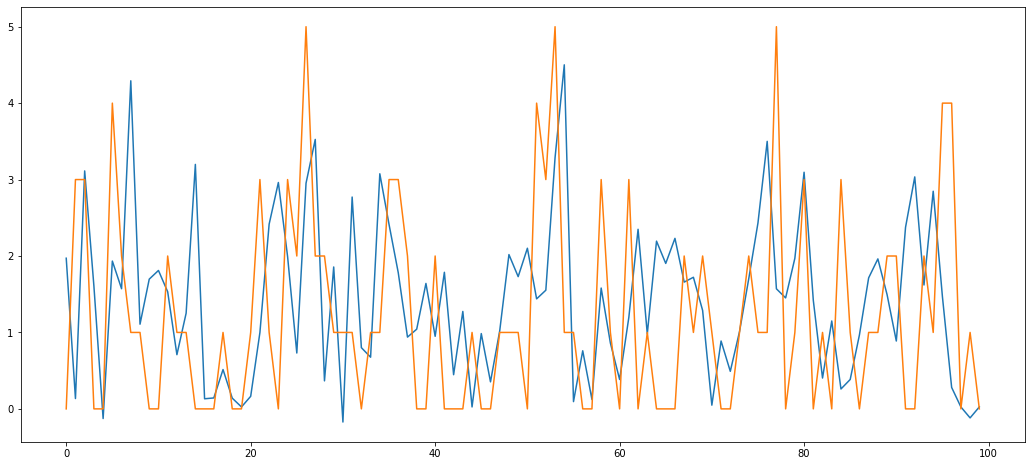

In [433]:
fig, ax = plt.subplots(figsize=(18,8))
plot_predictions1(model4, X2_test, y2_test)

# Ignore the below code

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

In [ ]:
df_18[df_18['MissedSales'].isna()] = 0.0

In [ ]:
df_18_X = df_18.drop(['SoldQuantity'],axis=1)
df_18_y = df_18['SoldQuantity']

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))

corrMatrix = df_18_X.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_18_X = df_18_X.drop(['GroupID','CategoryLvl2Desc_Bake Case','CategoryLvl2Desc_Cold Case','ItemType_Unassigned','CategoryLvl3Desc_Bagels'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_18_X, df_18_y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor

model_params = {
    
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            #######
        }  
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
             'alpha': [0.01,0.1,0.5,1.0]
         }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20]
         }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20,25]
         }
    },
        'gbm_regression' : {
        'model': GradientBoostingRegressor(),
        'params' : {
            'learning_rate': [0.1],
            'n_estimators': [500],
            'max_depth' : [1,2,5,7,10]
         }
    },
        'lgb' : {
        'model': LGBMRegressor(),
        'params' : {
            'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2,0.5],
            'n_estimators':[10,50,100,500,1000,1500]
         }
    },
        'XGB_regression' : {
        'model': XGBRegressor(),
        'params' : {
            'learning_rate': [0.1],
            'n_estimators': [1500,2000,2500,4000,5000],
            'max_depth' : [1,2,5,7,10]
         }
    },
        'XGBRF_regression' : {
        'model': XGBRFRegressor(),
        'params' : {
            'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2,0.5],
            'n_estimators':[10,50,100,500,1000,1500]
         }
    }
}

In [ ]:
# Model Selection and hyper-parameter tuning 
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_temp = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_temp

In [ ]:
df_temp

In [ ]:
import tensorflow as tf

In [ ]:
df_18.head()